# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Taufik Neldi
- **Email:** taufikneldi02@gmail.com
- **ID Dicoding:** MC006D5Y2033

## Menentukan Pertanyaan Bisnis

- Kapan waktu rata-rata puncak penyewaan sepeda dalam sehari?
- Bagaimana perbandingan rata-rata dan jumlah penyewaan sepeda antara pengguna "Casual" dan "Registered" pada hari kerja dan akhir pekan?
- Bagaimana perbandingan rata-rata penyewaan sepeda per bulan dari tahun 2011 dan 2012

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling



## Gathering Data 

Melakukan Pembacaan dataset yang akan dianalisis (menampilkan 5 baris utama pada setiap dataset)

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Neldi30/Data.csv/main/Data/Hour.csv")
day_df = pd.read_csv("https://raw.githubusercontent.com/Neldi30/Data.csv/main/Data/Day.csv")
hour_df.head(), day_df.head()

(   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1   0        0        6           0   
 1        2  2011-01-01       1   0     1   1        0        6           0   
 2        3  2011-01-01       1   0     1   2        0        6           0   
 3        4  2011-01-01       1   0     1   3        0        6           0   
 4        5  2011-01-01       1   0     1   4        0        6           0   
 
    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
 0           1  0.24  0.2879  0.81        0.0       3          13   16  
 1           1  0.22  0.2727  0.80        0.0       8          32   40  
 2           1  0.22  0.2727  0.80        0.0       5          27   32  
 3           1  0.24  0.2879  0.75        0.0       3          10   13  
 4           1  0.24  0.2879  0.75        0.0       0           1    1  ,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        

**Insight:**
- Dataset day.csv mencatat peminjaman sepeda dengan penghitungan per hari selama 731 hari.
- Dataset hour.csv mencatat peminjaman sepeda dengan penghitungan per jam selama 17379 jam.

### Assessing Data

In [4]:
hour_df.info()
print(hour_df.isna().sum())
hour_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
instant       0
dteday        0
season        0
y

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [5]:
day_df.info()
print(day_df.isna().sum())
day_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday      

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Mendeteksi Outlier Pada Data

In [6]:
# Mengidentifikasi outlier pada dataset day_df menggunakan metode IQR
q25_casual, q75_casual = np.percentile(day_df['casual'], 25), np.percentile(day_df['casual'], 75)
q25_registered, q75_registered = np.percentile(day_df['registered'], 25), np.percentile(day_df['registered'], 75)

# Menghitung IQR
iqr_casual = q75_casual - q25_casual
iqr_registered = q75_registered - q25_registered

# Menentukan cut-off untuk batas bawah dan atas
cut_off_casual = iqr_casual * 1.5
cut_off_registered = iqr_registered * 1.5

# Menentukan batas bawah dan atas
minimum_casual, maximum_casual = q25_casual - cut_off_casual, q75_casual + cut_off_casual
minimum_registered, maximum_registered = q25_registered - cut_off_registered, q75_registered + cut_off_registered

# Mengidentifikasi outlier
casual_outliers = [x for x in day_df['casual'] if x < minimum_casual or x > maximum_casual]
registered_outliers = [x for x in day_df['registered'] if x < minimum_registered or x > maximum_registered]

# Menampilkan outlier
print(f"Outlier di kolom 'casual': {casual_outliers}")
print(f"Outlier di kolom 'registered': {registered_outliers}")

Outlier di kolom 'casual': [2355, 2282, 3065, 2418, 2521, 2397, 3155, 2469, 2301, 2347, 3252, 2795, 2846, 2541, 2496, 2622, 3410, 2704, 2855, 3283, 2557, 2795, 2494, 2708, 2963, 2634, 2657, 2551, 2562, 2355, 2544, 2345, 2827, 2352, 2613, 2570, 3160, 2512, 2454, 2589, 3031, 2806, 2643, 2290]
Outlier di kolom 'registered': []


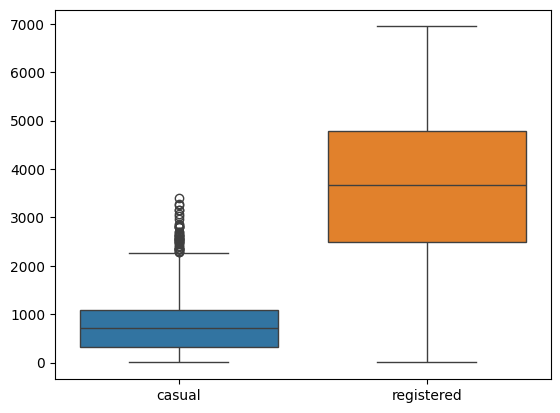

In [7]:
sns.boxplot(data=day_df[['casual', 'registered']])
plt.show()

In [8]:
# Mengidentifikasi outlier pada dataset hour_df menggunakan metode IQR
q25_casual, q75_casual = np.percentile(hour_df['casual'], 25), np.percentile(hour_df['casual'], 75)
q25_registered, q75_registered = np.percentile(hour_df['registered'], 25), np.percentile(hour_df['registered'], 75)

# Menghitung IQR
iqr_casual = q75_casual - q25_casual
iqr_registered = q75_registered - q25_registered

# Menentukan cut-off untuk batas bawah dan atas
cut_off_casual = iqr_casual * 1.5
cut_off_registered = iqr_registered * 1.5

# Menentukan batas bawah dan atas
minimum_casual, maximum_casual = q25_casual - cut_off_casual, q75_casual + cut_off_casual
minimum_registered, maximum_registered = q25_registered - cut_off_registered, q75_registered + cut_off_registered

# Mengidentifikasi outlier
casual_outliers = [x for x in hour_df['casual'] if x < minimum_casual or x > maximum_casual]
registered_outliers = [x for x in hour_df['registered'] if x < minimum_registered or x > maximum_registered]

# Menampilkan outlier
print(f"Outlier di kolom 'casual': {casual_outliers}")
print(f"Outlier di kolom 'registered': {registered_outliers}")

Outlier di kolom 'casual': [144, 149, 124, 126, 174, 168, 170, 175, 138, 120, 145, 172, 118, 139, 166, 219, 240, 174, 147, 148, 128, 121, 148, 156, 135, 119, 167, 181, 170, 179, 161, 143, 126, 182, 171, 180, 168, 149, 118, 124, 168, 205, 197, 167, 162, 142, 120, 178, 185, 184, 217, 191, 162, 134, 150, 123, 132, 129, 196, 143, 148, 119, 138, 142, 139, 166, 126, 128, 122, 120, 120, 195, 183, 206, 158, 137, 122, 173, 222, 191, 187, 232, 204, 191, 191, 117, 135, 164, 146, 180, 125, 120, 171, 145, 168, 172, 187, 201, 180, 173, 130, 139, 216, 237, 183, 221, 194, 214, 151, 141, 116, 153, 179, 133, 142, 132, 115, 120, 150, 188, 193, 180, 168, 142, 127, 121, 123, 154, 161, 161, 138, 126, 124, 150, 148, 142, 169, 147, 131, 120, 131, 176, 142, 115, 134, 162, 135, 138, 153, 193, 210, 118, 141, 141, 149, 124, 146, 121, 159, 122, 140, 140, 151, 157, 175, 152, 121, 136, 127, 175, 197, 197, 174, 177, 178, 117, 144, 142, 178, 177, 168, 206, 179, 193, 156, 136, 131, 215, 198, 248, 225, 194, 195, 181, 14

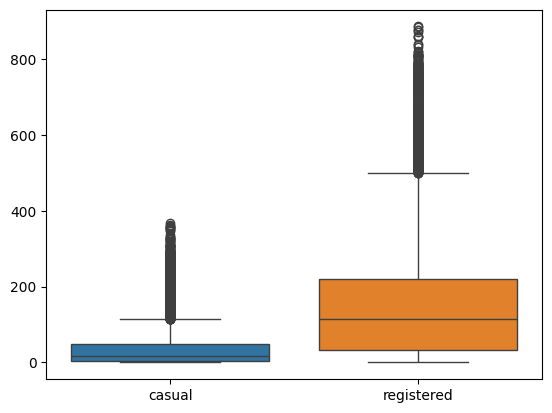

In [9]:
sns.boxplot(data=hour_df[['casual', 'registered']])
plt.show()

**Insight:**
- Dari pemeriksaan data yang sudah dilakukan, terlihat bahwa dataset-dataset sudah cukup bersih, dimana tidak ada data yang terduplikasi, dan tidak ada missing values.
- Namun, ada kesalahan yaitu pada kolom 'dteday' yang seharusnya berisi tipe data datetime, masih memiliki tipe data 'object' jadi harus diperbaiki.
- Dan juga, terdapat outliers pada dataset day_df dan hour_df di kolom 'casual' dan 'registered', khususnya kolom 'registered' di dataset hour_df yang outliernya cukup ekstrim seperti yang terlihat pada visual box plot.

### Cleaning Data

Melakukan pembersihan agar proses analisis data lebih mudah dilakukan

In [10]:
# Menghapus outlier dari dataframe
day_df_no_outliers = day_df[(day_df['casual'] >= minimum_casual) & (day_df['casual'] <= maximum_casual)]

# Menampilkan hasil setelah menghapus outlier
print(f"Jumlah data sebelum menghapus outlier: {len(day_df)}")
print(f"Jumlah data setelah menghapus outlier: {len(day_df_no_outliers)}")

Jumlah data sebelum menghapus outlier: 731
Jumlah data setelah menghapus outlier: 54


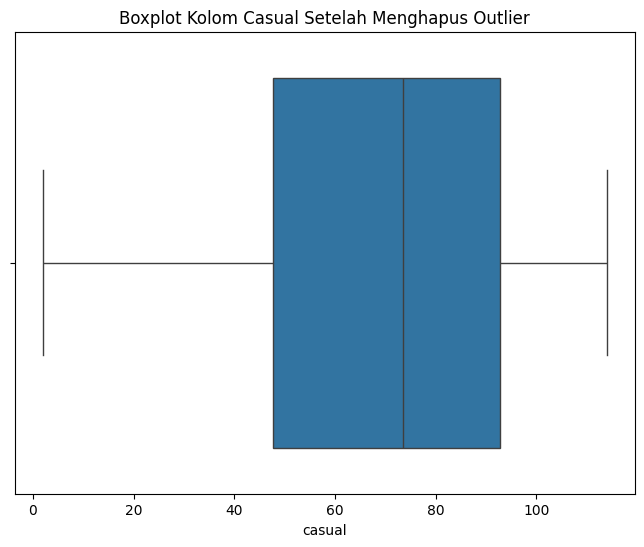

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=day_df_no_outliers['casual'])
plt.title('Boxplot Kolom Casual Setelah Menghapus Outlier')
plt.show()

In [12]:
# Menghapus outlier dari dataframe
hour_df_no_outliers = hour_df[(hour_df['casual'] >= minimum_casual) & (hour_df['casual'] <= maximum_casual)]

# Menampilkan hasil setelah menghapus outlier
print(f"Jumlah data sebelum menghapus outlier: {len(hour_df)}")
print(f"Jumlah data setelah menghapus outlier: {len(hour_df_no_outliers)}")

Jumlah data sebelum menghapus outlier: 17379
Jumlah data setelah menghapus outlier: 16187


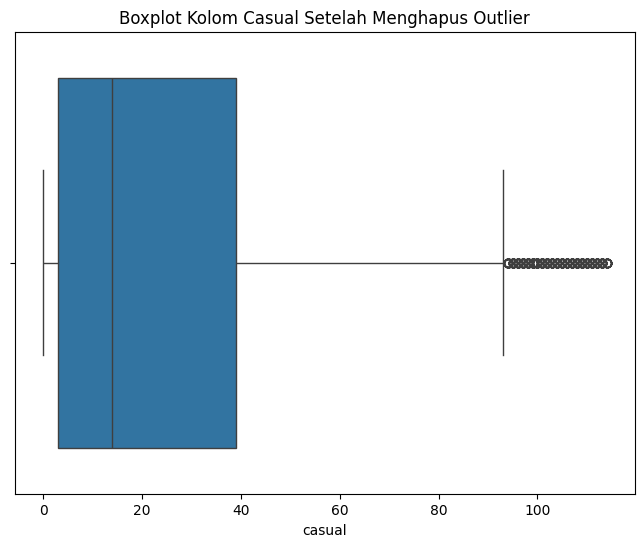

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=hour_df_no_outliers['casual'])
plt.title('Boxplot Kolom Casual Setelah Menghapus Outlier')
plt.show()

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
#Mengubah kata-kata pada data supaya mudah dipahami dan dibaca nantinya
day_df = day_df.rename(columns={
    'dteday': 'Date',
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather',
    'temp': 'Temperature',
    'atemp': 'Feeling Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'casual': 'Casual',
    'registered': 'Registered',
    'cnt': 'Total'
})

In [16]:
# Mengubah data numerik menjadi kategori yang lebih mudah dibaca
day_df['Season'] = day_df['Season'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['Year'] = day_df['Year'].replace({
    0: '2011', 1: '2012'
})

day_df['Month'] = day_df['Month'].replace({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

day_df['Holiday'] = day_df['Holiday'].replace({
    0: 'No Holiday',
    1: 'Holiday'
})

day_df['Weekday'] = day_df['Weekday'].replace({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

day_df['Working Day'] = day_df['Working Day'].replace({
    0: 'Holiday/Weekend',
    1: 'Working Day'
})

day_df['Weather'] = day_df['Weather'].replace({
    1: 'Clear',
    2: 'Mist and Cloudy',
    3: 'Light Snow',
    4: 'Heavy Rain'
})

In [17]:
# Melakukan perubahan tipe data menjadi category
day_df['Season'] = day_df['Season'].astype('category')
day_df['Year'] = day_df['Year'].astype('category')
day_df['Month'] = day_df['Month'].astype('category')
day_df['Holiday'] = day_df['Holiday'].astype('category')
day_df['Weekday'] = day_df['Weekday'].astype('category')
day_df['Working Day'] = day_df['Working Day'].astype('category')
day_df['Weather'] = day_df['Weather'].astype('category')

day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   instant              731 non-null    int64   
 1   Date                 731 non-null    object  
 2   Season               731 non-null    category
 3   Year                 731 non-null    category
 4   Month                731 non-null    category
 5   Holiday              731 non-null    category
 6   Weekday              731 non-null    category
 7   Working Day          731 non-null    category
 8   Weather              731 non-null    category
 9   Temperature          731 non-null    float64 
 10  Feeling Temperature  731 non-null    float64 
 11  Humidity             731 non-null    float64 
 12  Wind Speed           731 non-null    float64 
 13  Casual               731 non-null    int64   
 14  Registered           731 non-null    int64   
 15  Total                73

,instant,Date,Season,Year,Month,Holiday,Weekday,Working Day,Weather,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual,Registered,Total
0,1,2011-01-01,Spring,2011,January,No Holiday,Saturday,Holiday/Weekend,Mist and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,No Holiday,Sunday,Holiday/Weekend,Mist and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,No Holiday,Monday,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No Holiday,Tuesday,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No Holiday,Wednesday,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
day_df['Date'] = pd.to_datetime(day_df['Date'])
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   Date                 731 non-null    datetime64[ns]
 2   Season               731 non-null    category      
 3   Year                 731 non-null    category      
 4   Month                731 non-null    category      
 5   Holiday              731 non-null    category      
 6   Weekday              731 non-null    category      
 7   Working Day          731 non-null    category      
 8   Weather              731 non-null    category      
 9   Temperature          731 non-null    float64       
 10  Feeling Temperature  731 non-null    float64       
 11  Humidity             731 non-null    float64       
 12  Wind Speed           731 non-null    float64       
 13  Casual               731 non-null  

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [20]:
#Mengubah kata-kata pada data supaya mudah dipahami dan dibaca nantinya
hour_df = hour_df.rename(columns={
    'dteday': 'Date',
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'hr': 'Hour',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather',
    'temp': 'Temperature',
    'atemp': 'Feeling Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'casual': 'Casual',
    'registered': 'Registered',
    'cnt': 'Total'
})

In [21]:
# Mengubah data numerik menjadi kategori yang lebih mudah dibaca
hour_df['Season'] = hour_df['Season'].replace({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

hour_df['Year'] = hour_df['Year'].replace({
    0: '2011', 1: '2012'
})

hour_df['Month'] = hour_df['Month'].replace({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

hour_df['Holiday'] = hour_df['Holiday'].replace({
    0: 'No Holiday',
    1: 'Holiday'
})

hour_df['Weekday'] = hour_df['Weekday'].replace({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

hour_df['Working Day'] = hour_df['Working Day'].replace({
    0: 'Holiday/Weekend',
    1: 'Working Day'
})

hour_df['Weather'] = hour_df['Weather'].replace({
    1: 'Clear',
    2: 'Mist and Cloudy',
    3: 'Light Snow',
    4: 'Heavy Rain'
})


In [22]:
# Melakukan perubahan tipe data menjadi category
hour_df['Season'] = hour_df['Season'].astype('category')
hour_df['Year'] = hour_df['Year'].astype('category')
hour_df['Month'] = hour_df['Month'].astype('category')
hour_df['Holiday'] = hour_df['Holiday'].astype('category')
hour_df['Weekday'] = hour_df['Weekday'].astype('category')
hour_df['Working Day'] = hour_df['Working Day'].astype('category')
hour_df['Weather'] = hour_df['Weather'].astype('category')

hour_df.info()
hour_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   instant              17379 non-null  int64   
 1   Date                 17379 non-null  object  
 2   Season               17379 non-null  category
 3   Year                 17379 non-null  category
 4   Month                17379 non-null  category
 5   Hour                 17379 non-null  int64   
 6   Holiday              17379 non-null  category
 7   Weekday              17379 non-null  category
 8   Working Day          17379 non-null  category
 9   Weather              17379 non-null  category
 10  Temperature          17379 non-null  float64 
 11  Feeling Temperature  17379 non-null  float64 
 12  Humidity             17379 non-null  float64 
 13  Wind Speed           17379 non-null  float64 
 14  Casual               17379 non-null  int64   
 15  Registered         

,instant,Date,Season,Year,Month,Hour,Holiday,Weekday,Working Day,Weather,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual,Registered,Total
0,1,2011-01-01,Spring,2011,January,0,No Holiday,Saturday,Holiday/Weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No Holiday,Saturday,Holiday/Weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No Holiday,Saturday,Holiday/Weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No Holiday,Saturday,Holiday/Weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No Holiday,Saturday,Holiday/Weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
hour_df['Date'] = pd.to_datetime(hour_df['Date'])
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   Date                 17379 non-null  datetime64[ns]
 2   Season               17379 non-null  category      
 3   Year                 17379 non-null  category      
 4   Month                17379 non-null  category      
 5   Hour                 17379 non-null  int64         
 6   Holiday              17379 non-null  category      
 7   Weekday              17379 non-null  category      
 8   Working Day          17379 non-null  category      
 9   Weather              17379 non-null  category      
 10  Temperature          17379 non-null  float64       
 11  Feeling Temperature  17379 non-null  float64       
 12  Humidity             17379 non-null  float64       
 13  Wind Speed           17379 non-

**Insight:**
1. Define:
- Menemukan tipe data kolom 'dteday' masih object.
- Nama kolom masih susah untuk dibaca.
- Tipe data kolom lain masih susah untuk dibaca.
- Ada beberapa outlier pada dataset day_df dan hour_df.

2. Code:
- Mengubah tipe data kolom 'dteday' menjadi datetime.
- Mengubah nama kolom agar mudah dibaca.
- Mengubah tipe data kolom lain menjadi category.
- Mengatasi outlier dengan metode winsorizing.

3. Verify:
- Melakukan review ulang dengan method info() dan head() untuk mengetahui apakah data sudah sesuai dengan yang diinginkan atau belum.
- Melakukan pengecekan terhadap box plot untuk pengecekan apakah outliers sudah teratasi.

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
day_df.describe(include="all")

,instant,Date,Season,Year,Month,Holiday,Weekday,Working Day,Weather,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual,Registered,Total
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,August,No Holiday,Monday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [25]:
hour_df.describe(include="all")

,instant,Date,Season,Year,Month,Hour,Holiday,Weekday,Working Day,Weather,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual,Registered,Total
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,No Holiday,Saturday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [26]:
hour_df.groupby(by='Hour').agg({
    'Casual': ['max', 'min', 'mean'],
    'Registered': ['max', 'min', 'mean'],
    'Total': ['max', 'min', 'mean']
})

Casual                Registered                 Total                
        max min       mean        max min        mean   max min        mean
Hour                                                                       
0        68   0  10.158402        234   0   43.739669   283   2   53.898072
1        49   0   6.504144        139   0   26.871547   168   1   33.375691
2        44   0   4.772028        104   0   18.097902   132   1   22.869930
3        26   0   2.715925         61   0    9.011478    79   1   11.727403
4        13   0   1.253945         22   0    5.098996    28   1    6.352941
5        16   0   1.411437         64   0   18.478382    66   1   19.889819
6        19   0   4.161379        203   0   71.882759   213   1   76.044138
7        40   0  11.055021        572   1  201.009629   596   1  212.064649
8        69   0  21.679505        808   4  337.331499   839   5  359.011004
9       142   0  30.891334        399   6  188.418157   426  14  219.309491
10      209   0  46.477304        351   8  127.191197   539   8  173.668501
11      268   0  59.540578        446   5  148.602476   663  10  208.143054
12      362   0  68.293956        526   3  185.021978   776   3  253.315934
13      355   0  72.308642        491   9  181.352538   760  11  253.661180
14      361   0  75.567901        502  12  165.381344   750  12  240.949246
15      357   0  74.905350        456   4  176.327846   750   7  251.233196
16      367   0  73.745205        481   8  238.238356   783  11  311.983562
17      347   0  74.273973        885  14  387.178082   976  15  461.452055
18      266   0  61.120879        886  20  364.390110   977  23  425.510989
19      230   0  48.770604        662  11  262.752747   743  11  311.523352
20      237   0  36.233516        461   8  189.796703   567  11  226.030220
21      222   0  28.255495        362   6  144.059066   584   6  172.314560
22      175   0  22.252747        327   5  109.082418   502   9  131.335165
23       71   0  15.199176        220   2   72.631868   256   2   87.831044

In [27]:
day_df.groupby(by='Working Day').agg({
    'Casual': ['max', 'min', 'mean'],
    'Registered': ['max', 'min', 'mean'],
    'Total': ['max', 'min', 'mean']
})

C:\Users\taufi\AppData\Local\Temp\ipykernel_26684\894865608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='Working Day').agg({


Casual                  Registered                   Total  \
                   max min         mean        max  min         mean   max   
Working Day                                                                  
Holiday/Weekend   3410  54  1371.134199       5966  451  2959.034632  8714   
Working Day       2469   2   606.570000       6946   20  3978.250000  8362   

                                   
                 min         mean  
Working Day                        
Holiday/Weekend  605  4330.168831  
Working Day       22  4584.820000

In [28]:
day_df.groupby(by='Season').agg({
    'Casual': ['max', 'min', 'mean'],
    'Registered': ['max', 'min', 'mean'],
    'Total': ['max', 'min', 'mean']
}).sort_values(by=('Total', 'mean'), ascending=False)

C:\Users\taufi\AppData\Local\Temp\ipykernel_26684\3129220417.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='Season').agg({


Casual                   Registered                   Total        \
          max  min         mean        max  min         mean   max   min   
Season                                                                     
Fall     3160  118  1202.611702       6917  889  4441.691489  8714  1115   
Summer   3410  120  1106.097826       6456  674  3886.233696  8362   795   
Winter   3031    2   729.112360       6946   20  3999.050562  8555    22   
Spring   3155    9   334.928177       5315  416  2269.204420  7836   431   

                     
               mean  
Season               
Fall    5644.303191  
Summer  4992.331522  
Winter  4728.162921  
Spring  2604.132597

In [29]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

day_df['Month'] = pd.Categorical(day_df['Month'], categories=month_order, ordered=True)

day_df.groupby(by=['Year', 'Month']).agg({'Total': ['max', 'min', 'mean']}).reset_index().sort_values(by=["Year", "Month"]).set_index(["Year", "Month"])

C:\Users\taufi\AppData\Local\Temp\ipykernel_26684\2454578258.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['Year', 'Month']).agg({'Total': ['max', 'min', 'mean']}).reset_index().sort_values(by=["Year", "Month"]).set_index(["Year", "Month"])


Total                   
                 max   min         mean
Year Month                             
2011 January    1985   431  1231.903226
     February   2927  1005  1721.964286
     March      3239   605  2065.967742
     April      5312   795  3162.333333
     May        5805  2633  4381.322581
     June       5515  3767  4783.733333
     July       6043  3285  4559.387097
     August     5895  1115  4409.387097
     September  5423  1842  4247.266667
     October    5511   627  3984.225806
     November   4486  1495  3405.566667
     December   3940   705  2816.870968
2012 January    4521  1301  3120.774194
     February   5062  1529  3556.448276
     March      8362  3194  5318.548387
     April      7460  1027  5807.466667
     May        8294  2843  6318.225806
     June       8120  4127  6761.000000
     July       8173  4459  6567.967742
     August     7865  4549  6919.451613
     September  8714  4073  7285.766667
     October    8156    22  6414.225806
     November   6852  2277  5088.800000
     December   6606   441  3990.741935

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:Kapan waktu rata-rata puncak penyewaan sepeda dalam sehari?


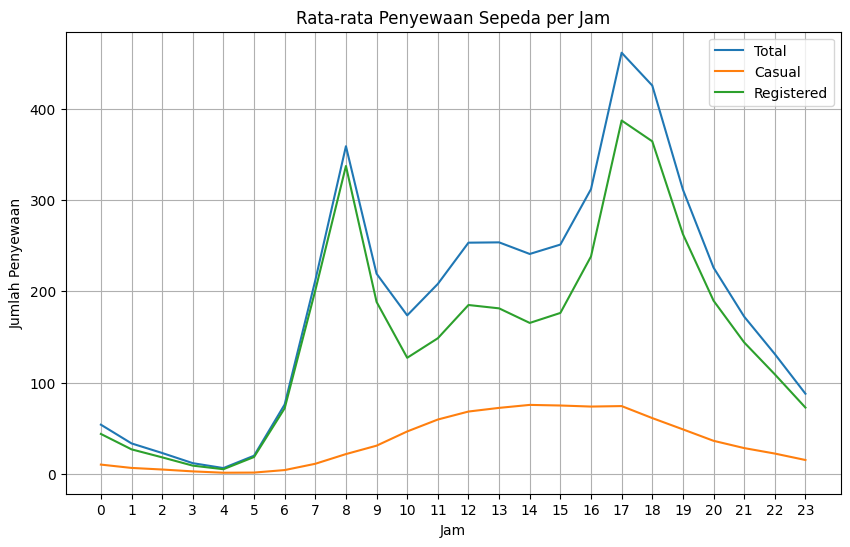

In [30]:
hourly_counts = hour_df.groupby('Hour')['Total'].mean()
hourly_casual = hour_df.groupby('Hour')['Casual'].mean()
hourly_registered = hour_df.groupby('Hour')['Registered'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, label='Total')
sns.lineplot(x=hourly_casual.index, y=hourly_casual.values, label='Casual')
sns.lineplot(x=hourly_registered.index, y=hourly_registered.values, label='Registered')

plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()


### Pertanyaan 2: Bagaimana perbandingan rata-rata dan jumlah penyewaan sepeda antara pengguna "Casual" dan "Registered" pada hari kerja dan akhir pekan?

C:\Users\taufi\AppData\Local\Temp\ipykernel_26684\2303105175.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_data = hour_df.groupby('Working Day').agg({


<Figure size 800x500 with 0 Axes>

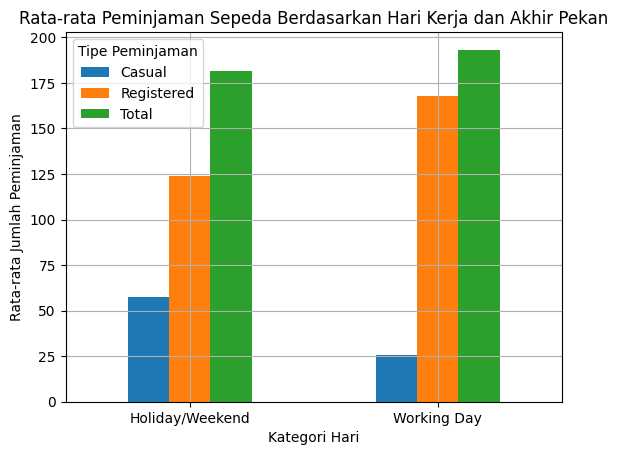

In [31]:
workingday_data = hour_df.groupby('Working Day').agg({
    'Casual': 'mean',
    'Registered': 'mean',
    'Total': 'mean'
}).reset_index()

plt.figure(figsize=(8, 5))
workingday_data.set_index('Working Day')[['Casual', 'Registered', 'Total']].plot(kind='bar', stacked=False)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari Kerja dan Akhir Pekan')
plt.xlabel('Kategori Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.legend(title='Tipe Peminjaman')
plt.grid(True)
plt.show()


### Pertanyaan 3: Bagaimana perbandingan rata-rata penyewaan sepeda per bulan dari tahun 2011 dan 2012

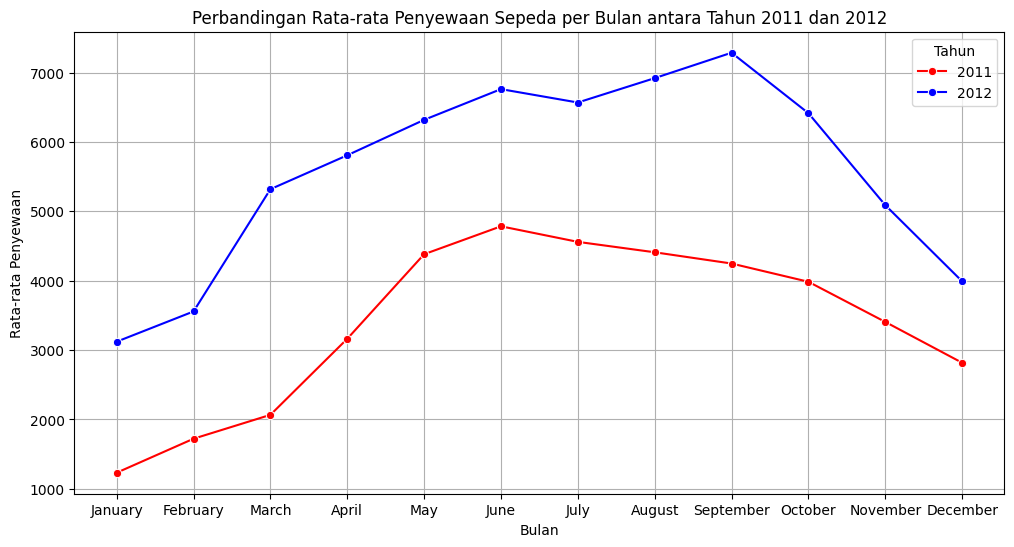

In [32]:
monthly_data = pd.DataFrame({
    'Year': [2011]*12 + [2012]*12,
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']*2,
    'Total': [1231.903226, 1721.964286, 2065.967742, 3162.333333, 4381.322581, 4783.733333, 4559.387097, 4409.387097, 4247.266667, 3984.225806, 3405.566667, 2816.870968,
             3120.774194, 3556.448276, 5318.548387, 5807.466667, 6318.225806, 6761.000000, 6567.967742, 6919.451613, 7285.766667, 6414.225806, 5088.800000, 3990.741935]
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data[monthly_data['Year'] == 2011], x='Month', y='Total', marker='o', color='red', label='2011')
sns.lineplot(data=monthly_data[monthly_data['Year'] == 2012], x='Month', y='Total', marker='o', color='blue', label='2012')
plt.title('Perbandingan Rata-rata Penyewaan Sepeda per Bulan antara Tahun 2011 dan 2012')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(title='Tahun')
plt.grid(True)
plt.show()

**Insight:**
- Rata-rata puncak peminjaman sepeda yaitu ada pada pagi hari dan sore hari dan kemungkinan faktor yang mempengaruhi puncak pada waktu tersebut yaitu adalah jam kerja dan jam pulang kerja dan 
- Rata-rata yang paling sering meminjam yaitu peminjam yang registered dibanding casual
- Dan pada Holiday/Weekend peminjam casual meningkat 
- Perbadingan rata-rata peminjaman dari tahun 2011 dan 2012 mengalami peningkatan 

## Conclusion

- Kapan waktu rata-rata puncak penyewaan sepeda dalam sehari?

Dari data tabel yang sudah saya buat dapat disimpulkan bahwa rata2 peminjaman sehari itu memiliki puncak pada jam 8 pagi dan 5 sore dan disini saya bisa menyimpulkan bahwa pada pagi hari peminjaman meningkat dikarenakan pada saat pagi hari banyak orang yang memakai sepeda untuk pergi bekerja dan pada saat sore harinya meningkat dikarenakan pada saat itu merupakan jam pulang dari kerja.

- Bagaimana perbandingan rata-rata dan jumlah penyewaan sepeda antara pengguna "Casual" dan "Registered" pada hari kerja dan akhir pekan?

Grafik tersebut menggambarkan perbandingan rata-rata jumlah peminjaman sepeda antara hari kerja (Working Day) dan akhir pekan atau hari libur (Holiday/Weekend) berdasarkan dua kategori pengguna, yaitu pengguna Casual dan pengguna Registered. Dari visualisasi tersebut terlihat bahwa jumlah peminjaman oleh pengguna terdaftar selalu lebih tinggi dibandingkan pengguna kasual, baik pada hari kerja maupun akhir pekan.

Peminjaman sepeda oleh pengguna kasual cenderung meningkat pada akhir pekan, yang mengindikasikan bahwa mereka lebih banyak menggunakan sepeda untuk aktivitas rekreasi atau santai. Sebaliknya, pengguna Registered lebih aktif melakukan peminjaman pada hari kerja, yang kemungkinan besar menunjukkan bahwa mereka memanfaatkan layanan ini untuk keperluan transportasi sehari-hari, seperti pergi ke kantor.

- Bagaimana perbandingan rata-rata penyewaan sepeda per bulan dari tahun 2011 dan 2012

Grafik tersebut menunjukkan perbandingan rata-rata penyewaan sepeda per bulan antara tahun 2011 dan 2012. Terlihat jelas bahwa jumlah penyewaan sepeda pada tahun 2012 (garis biru) selalu lebih tinggi dibandingkan dengan tahun 2011 (garis merah) di setiap bulan.Peningkatan penyewaan pada kedua tahun tersebut mengikuti pola musiman yang serupa, dengan tren kenaikan yang dimulai sejak awal tahun dan mencapai puncaknya di bulan Juni dan Juli, kemudian menurun secara bertahap hingga Desember.